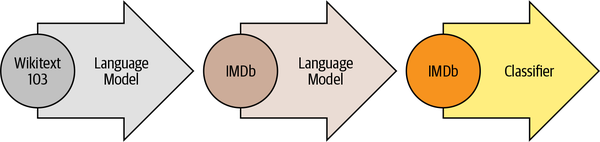

In [1]:
# Transfer Learning
# Step 1 --> Pre training
#     Use the very large dataset (Wikipedia), and find the relationships between the words

# Step 2 --> Fine tuning on Domain dataset - Movie reviews

# Step 3 --> Fine tune it for the required task - Sentiment Classification


# GPT - Decoder Only Transformers
# BERT - Encoder Only Transformers

In [2]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [3]:
from transformers import pipeline
import pandas as pd
import numpy as np

classifier = pipeline("text-classification")
outputs = classifier(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,label,score
0,NEGATIVE,0.901545


In [4]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,score,start,end,answer
0,0.631291,335,358,an exchange of Megatron


In [5]:
!pip install datasets transformers

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00


In [6]:
from datasets import load_dataset
emotions = load_dataset("emotion")

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [7]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
train_ds.column_names

['text', 'label']

In [10]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [11]:
import pandas as pd
emotions.set_format(type = "pandas")

In [12]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [14]:
label_int2str(5),label_int2str(1),label_int2str(0)

('surprise', 'joy', 'sadness')

In [15]:
df["label_name"] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


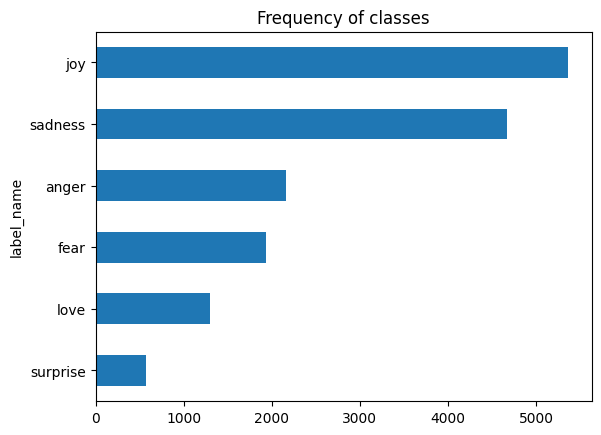

In [16]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
plt.show()

In [17]:
emotions.reset_format()

In [18]:
# Tokenization
# Subword tokenization

from transformers import AutoTokenizer
model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [19]:
print(text)

Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.


In [20]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 6203, 9733, 1010, 2197, 2733, 1045, 3641, 2019, 23569, 19315, 3539, 2895, 3275, 2013, 2115, 3784, 3573, 1999, 2762, 1012, 6854, 1010, 2043, 1045, 2441, 1996, 7427, 1010, 1045, 3603, 2000, 2026, 5469, 2008, 1045, 2018, 2042, 2741, 2019, 2895, 3275, 1997, 13164, 15312, 2612, 999, 2004, 1037, 13506, 4099, 1997, 1996, 11703, 23606, 28524, 2015, 1010, 1045, 3246, 2017, 2064, 3305, 2026, 21883, 1012, 2000, 10663, 1996, 3277, 1010, 1045, 5157, 2019, 3863, 1997, 13164, 15312, 2005, 1996, 23569, 19315, 3539, 3275, 1045, 3641, 1012, 10837, 2024, 4809, 1997, 2026, 2636, 7175, 2023, 5309, 1012, 1045, 5987, 2000, 2963, 2013, 2017, 2574, 1012, 25664, 1010, 26352, 3468, 11306, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'dear',
 'amazon',
 ',',
 'last',
 'week',
 'i',
 'ordered',
 'an',
 'opt',
 '##imus',
 'prime',
 'action',
 'figure',
 'from',
 'your',
 'online',
 'store',
 'in',
 'germany',
 '.',
 'unfortunately',
 ',',
 'when',
 'i',
 'opened',
 'the',
 'package',
 ',',
 'i',
 'discovered',
 'to',
 'my',
 'horror',
 'that',
 'i',
 'had',
 'been',
 'sent',
 'an',
 'action',
 'figure',
 'of',
 'mega',
 '##tron',
 'instead',
 '!',
 'as',
 'a',
 'lifelong',
 'enemy',
 'of',
 'the',
 'dec',
 '##ept',
 '##icon',
 '##s',
 ',',
 'i',
 'hope',
 'you',
 'can',
 'understand',
 'my',
 'dilemma',
 '.',
 'to',
 'resolve',
 'the',
 'issue',
 ',',
 'i',
 'demand',
 'an',
 'exchange',
 'of',
 'mega',
 '##tron',
 'for',
 'the',
 'opt',
 '##imus',
 'prime',
 'figure',
 'i',
 'ordered',
 '.',
 'enclosed',
 'are',
 'copies',
 'of',
 'my',
 'records',
 'concerning',
 'this',
 'purchase',
 '.',
 'i',
 'expect',
 'to',
 'hear',
 'from',
 'you',
 'soon',
 '.',
 'sincerely',
 ',',
 'bum',
 '##ble',
 '##bee',
 '.

In [22]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [23]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [24]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

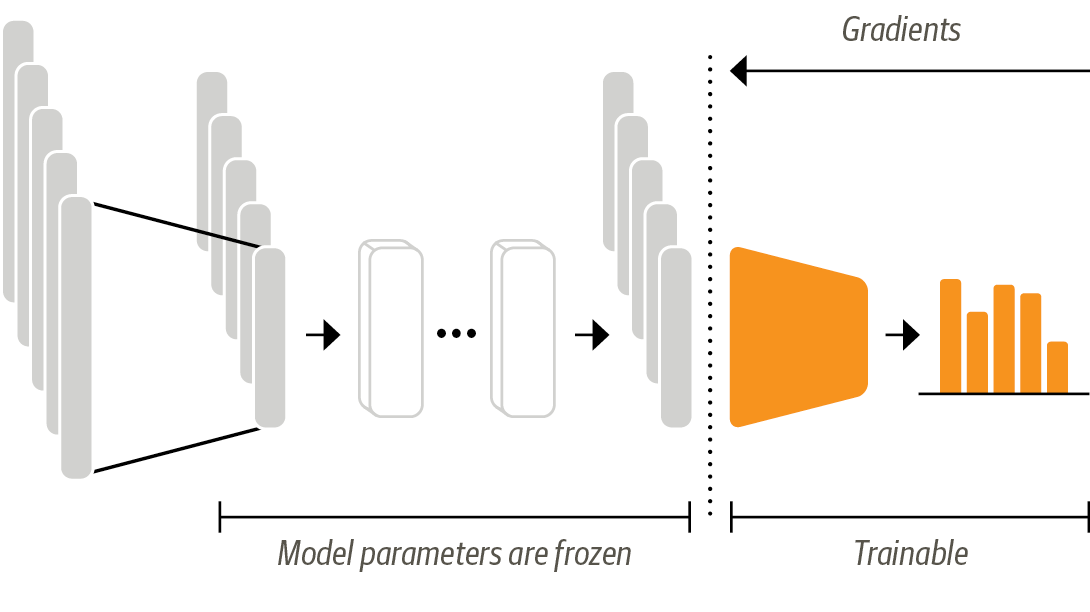

In [30]:
from transformers import AutoModel
import torch

device = torch.device("cuda:0")
loaded_model = AutoModel.from_pretrained(model).to(device)

In [34]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names }
  with torch.no_grad(): # forward pass without entering the training mode
    model_output = loaded_model(**inputs)
  state = model_output[0]
  return {"hidden_state": state[:,0].cpu().numpy()}

In [35]:
emotions_encoded.set_format("torch", columns=["input_ids","attention_mask","label"])

In [36]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [37]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [38]:
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_valid = np.array(emotions_hidden['validation']['label'])

In [39]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [40]:
lr_clf.score(X_valid,y_valid)

0.635

In [48]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 6
model_loaded = (AutoModelForSequenceClassification
         .from_pretrained(model, num_labels=num_labels)
         .to(device))

In [49]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f"{model}-finetuned-emotion"

training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [50]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [51]:

from transformers import Trainer

trainer = Trainer(model=model_loaded, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········
 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.807000,0.290203,0.915000,0.914738
2,0.232500,0.203969,0.929000,0.929081
